### Clustering on the Information dataset using MiniBatch KMeans++

Since the data set is greater 10k, we implement the minibatch kmeans 

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("information-dataset.tsv", delimiter = "\t", header = None)

In [3]:
data.head()

,0,1,2,3,4,5
0,19443209,149000,3,65,2,0
1,20698481,190000,4,145,1,2
2,21929101,630000,5,200,2,4
3,24894425,470000,5,211,3,0
4,25773866,300000,3,92,1,0


In [4]:
data.columns = ["annoucements",
               "price",
               "locali",
               "super ficie",
               "bagni",
               "piano"]

In [5]:
data.head()

,annoucements,price,locali,super ficie,bagni,piano
0,19443209,149000,3,65,2,0
1,20698481,190000,4,145,1,2
2,21929101,630000,5,200,2,4
3,24894425,470000,5,211,3,0
4,25773866,300000,3,92,1,0


In [6]:
#drop annoucements 
info_data = data.drop("annoucements", 1)

In [7]:
info_data.head()

,price,locali,super ficie,bagni,piano
0,149000,3,65,2,0
1,190000,4,145,1,2
2,630000,5,200,2,4
3,470000,5,211,3,0
4,300000,3,92,1,0


In [8]:
len(info_data)

20013

In [9]:
#converting information dataset into matrix
info_mat = info_data.as_matrix(columns = None)

In [10]:
info_mat

array([[149000,      3,     65,      2,      0],
       [190000,      4,    145,      1,      2],
       [630000,      5,    200,      2,      4],
       ...,
       [155000,      4,    125,      1,      3],
       [228000,      3,     83,      1,      3],
       [142000,      3,     90,      1,      3]])

In [ ]:
plt.style.use('ggplot')
fig = plt.figure()
plt.scatter(info_mat, marker='.', alpha=0.3)
plt.show()

In [11]:
#data transformation using the MinMaxScaler, normalizing the data 
mms = MinMaxScaler()
mms.fit(info_mat)
data_transformed = mms.transform(info_mat)
data_transformed

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[2.29229231e-04, 5.00000000e-01, 2.32728119e-04, 5.00000000e-01,
        7.69230769e-02],
       [2.92306154e-04, 7.50000000e-01, 5.23638268e-04, 0.00000000e+00,
        2.30769231e-01],
       [9.69229232e-04, 1.00000000e+00, 7.23638995e-04, 5.00000000e-01,
        3.84615385e-01],
       ...,
       [2.38460000e-04, 7.50000000e-01, 4.50910731e-04, 0.00000000e+00,
        3.07692308e-01],
       [3.50767693e-04, 5.00000000e-01, 2.98182902e-04, 0.00000000e+00,
        3.07692308e-01],
       [2.18460000e-04, 5.00000000e-01, 3.23637541e-04, 0.00000000e+00,
        3.07692308e-01]])

In [12]:
Sum_of_squared_distances = {}
for k in range(1, 20):
    km = MiniBatchKMeans(n_clusters= k, init ="k-means++", batch_size = 200)
    km.fit(data_transformed)
    Sum_of_squared_distances[k] = km.inertia_

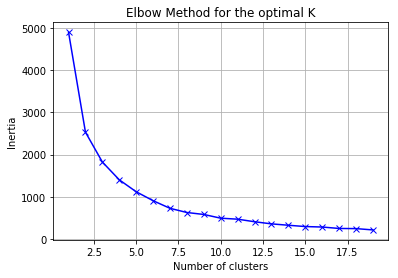

In [13]:
plt.plot(list(Sum_of_squared_distances.keys()), list(Sum_of_squared_distances.values()), "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for the optimal K")
plt.grid()
plt.show()

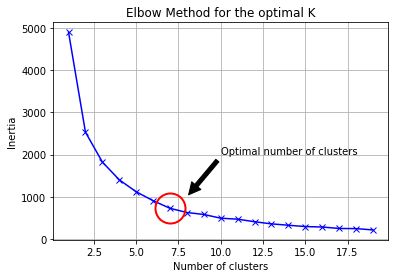

In [21]:
x=list(Sum_of_squared_distances.keys())
y= list(Sum_of_squared_distances.values())
fig = plt.figure()
plt.plot(x, y, "bx-")
plt.plot(x[6], y[6], 'o', ms=30, mec='r', mfc='none', mew=2)
plt.annotate('Optimal number of clusters', 
             xy=(8,1000), xytext=(10,2000),
             arrowprops = dict(facecolor='black', shrink=0.05))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for the optimal K")
plt.grid()
plt.show()
fig.savefig("optimal-clusters.png")

The optimal number of clusters from the elbow method is 7

For the clustering plot 

In [24]:
model = MiniBatchKMeans(n_clusters = 7, init='k-means++', batch_size = 200)
model.fit(data_transformed)

MiniBatchKMeans(batch_size=200, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=7,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [26]:
centroids = model.cluster_centers_
centroids 

array([[8.07417372e-04, 8.62616099e-01, 5.05563336e-04, 5.00000000e-01,
        2.41128840e-01],
       [4.26604371e-04, 5.66444175e-01, 3.41956230e-04, 0.00000000e+00,
        2.14525765e-01],
       [9.50090778e-04, 7.44292237e-01, 5.08013470e-04, 5.70776256e-01,
        9.69792764e-01],
       [2.94547590e-04, 2.17000000e-01, 2.11588648e-04, 0.00000000e+00,
        1.77538462e-01],
       [1.60874687e-03, 9.35512367e-01, 7.64345857e-04, 1.00000000e+00,
        2.32943735e-01],
       [5.16362024e-04, 4.93257261e-01, 3.42732291e-04, 5.02074689e-01,
        2.27417810e-01],
       [3.85080872e-04, 3.34183673e-01, 2.53099251e-04, 0.00000000e+00,
        7.93956044e-01]])

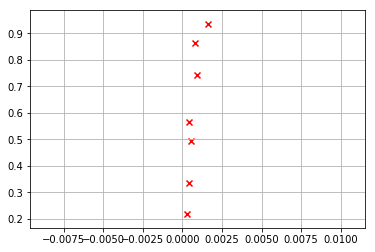

In [28]:
fig = plt.figure()
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red')
plt.grid()
plt.show()